$Step-1$:

**Import packages**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt

$Step-2$:

**About the dataset**

Here we use a dataset name : CIFAR

It containes 60000 images and 10 classes

Each class containes 6000 images

Data set is divided into two parts training images: 50,000

testing images: 10,000

In [2]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
train_images.shape

# 50000 images
# 32 is width
# 32 is height
# 3 RGB : these are colour images

(50000, 32, 32, 3)

In [4]:
32*32*3

3072

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
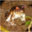

In [5]:
train_images[0]

$Step-3$:

**Draw the images**

In [6]:
# Take the class labels first
train_labels   # list in list

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
len(datasets.cifar10.load_data())

2

In [8]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
len(class_names)

10

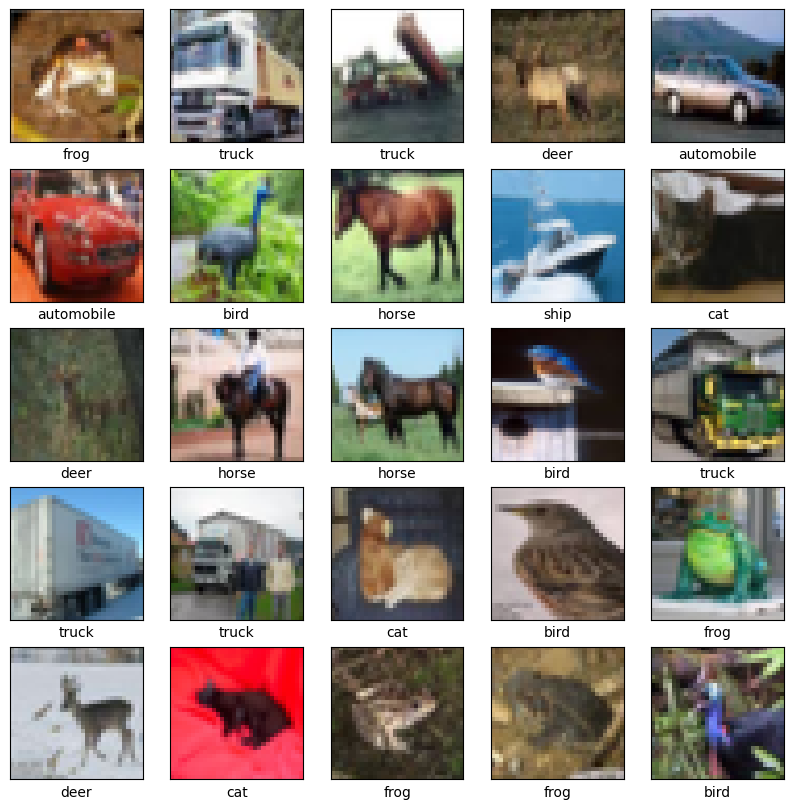

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
# Try to apply some smoothing tech
# Guassian blurr
# Median filter
# Those are avaialble in opnecv

$Step-4$

**Create the CNN network**

- Convolution

- Activation

- Striding (default =1) (not necessary to provide

- Padding (not necessary to provide)

- pooling

In [10]:
#model=models.Sequential()
#model.add(layers.Conv2D())

# filter is your weight    3*3*3 : 27*32=864
model=models.Sequential()
model.add(layers.Conv2D())

In [11]:
model=models.Sequential()

#############################################################################################
model.add(layers.Conv2D(32, # filters
                        (3,3), # filter size/kernal size
                        activation='relu',
                        input_shape=(32,32,3)
                        ))  # Stride / padding : default

model.add(layers.MaxPool2D((2,2)))  # shape of the pool

###############################################################################################
model.add(layers.Conv2D(64, # filters
                        (3,3), # filter size/kernal size
                        activation='relu'))  # stride /padding: deafault

model.add(layers.MaxPool2D((2,2)))

###############################################################################################

model.add(layers.Conv2D(64, # filters
                        (3,3), # filter size/kernal size
                        activation='relu'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

$Step-5$:

**Add dense layers**

In [13]:
model.add(layers.Flatten()) # After convolution ==== Fully connect layer
model.add(layers.Dense(64,activation='relu'))  # Hidden layer 64 neurons, relu activation function
model.add(layers.Dense(10)) # 10 classes so 10 neurons

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

$Step-6$:

**Compile the model**

In [15]:
model.compile(optimizer='adam', #optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss
              metrics=['accuracy']# metric
              )

history=model.fit(train_images,train_labels, epochs=10,
                  validation_data=(test_images,test_labels))

# 1 epoch= one forward pass + one backward pass
# Total train images are 50000
# By default batch size =32
# 50000/32~=1563 batches

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 1.8107 - accuracy: 0.3671 - val_loss: 1.4928 - val_accuracy: 0.4528
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3854 - accuracy: 0.5031 - val_loss: 1.4025 - val_accuracy: 0.5114
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2221 - accuracy: 0.5672 - val_loss: 1.2095 - val_accuracy: 0.5764
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1180 - accuracy: 0.6056 - val_loss: 1.1883 - val_accuracy: 0.5932
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0286 - accuracy: 0.6408 - val_loss: 1.0894 - val_accuracy: 0.6283
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9566 - accuracy: 0.6691 - val_loss: 1.1053 - val_accuracy: 0.6233
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9028 - accuracy: 0.6858 - val_loss: 1.0777 - val_accuracy

In [16]:
history.history

{'loss': [1.8107112646102905,
  1.3853625059127808,
  1.2220888137817383,
  1.1180022954940796,
  1.0286424160003662,
  0.956620454788208,
  0.9028192162513733,
  0.8570449948310852,
  0.8110272884368896,
  0.766227126121521],
 'accuracy': [0.36706000566482544,
  0.5031399726867676,
  0.5672199726104736,
  0.6056200265884399,
  0.6407999992370605,
  0.6691399812698364,
  0.6858400106430054,
  0.7024999856948853,
  0.7192599773406982,
  0.7337599992752075],
 'val_loss': [1.4927765130996704,
  1.4025006294250488,
  1.209528923034668,
  1.1883126497268677,
  1.0893744230270386,
  1.105281114578247,
  1.0777469873428345,
  1.0702909231185913,
  1.1055461168289185,
  1.0969091653823853],
 'val_accuracy': [0.4528000056743622,
  0.5113999843597412,
  0.5763999819755554,
  0.5932000279426575,
  0.6283000111579895,
  0.6233000159263611,
  0.6402000188827515,
  0.6399999856948853,
  0.6464999914169312,
  0.6480000019073486]}

313/313 - 1s - loss: 1.0969 - accuracy: 0.6480 - 868ms/epoch - 3ms/step


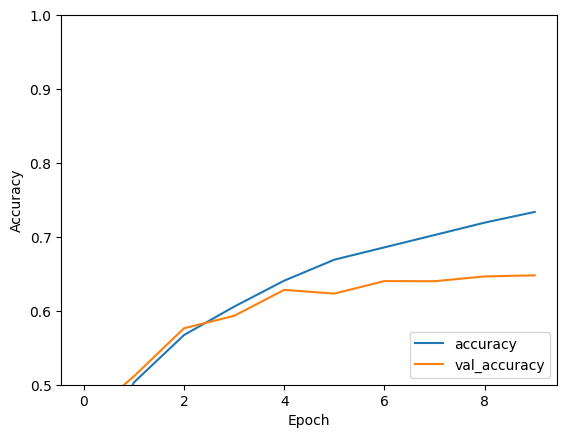

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
#Sir what about normalization in this dataset?
# scale down the values
# scale up or scale down result will not change
# it is only speed up the process

In [18]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-9.48722214e-02,  1.58891886e-01,  1.62933514e-01,
            4.28065658e-02, -2.10029200e-01,  6.63188547e-02,
           -1.62602767e-01,  4.39849980e-02, -5.53695560e-02,
            5.31286234e-03, -8.88527706e-02, -1.94993168e-02,
           -1.75667442e-02, -1.39700949e-01, -1.04501277e-01,
            9.31598768e-02,  1.64895043e-01, -6.85663074e-02,
            1.13851219e-01, -1.60976470e-01, -1.78400248e-01,
            1.98878184e-01,  1.02708042e-01,  9.66282282e-03,
            8.79069343e-02,  8.91683623e-03, -3.84802371e-02,
            2.81877946e-02, -3.83403003e-02,  1.76163480e-01,
           -1.07848242e-01,  8.24725628e-02],
          [ 3.83118987e-02,  1.65014014e-01, -2.47598975e-03,
            4.02699374e-02, -1.18371680e-01,  1.09508023e-01,
           -1.28873363e-01,  1.50625277e-02, -4.62083593e-02,
           -1.30668640e-01, -1.56804442e-01, -9.75982323e-02,
            

In [ ]:
test_labels.flatten()

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
import numpy as np
import pandas as pd

y_pred = model.predict(test_images)
max_prob=[np.max(i)  for i in y_pred]
index=[np.argmax(i) for i in y_pred]
prediction_class=[class_names[i] for i in index]
Ground_Truth_class=[class_names[i] for i in test_labels.flatten()]

d1=pd.DataFrame(zip(max_prob,index,prediction_class,Ground_Truth_class),
             columns=['Max_proba','Index','Prediction_class','Ground_Truth_class'])
con=d1['Prediction_class']==d1['Ground_Truth_class']
d1['output']=np.where(con,1,0)
accuracy=d1['output'].sum()/len(d1['output'])
accuracy

313/313 [==============================] - 1s 2ms/step


0.6602

In [ ]:
d1

,Max_proba,Index,Prediction_class,Ground_Truth_class,output
0,13.083898,3,cat,cat,1
1,15.287342,8,ship,ship,1
2,6.120108,8,ship,ship,1
3,5.596895,8,ship,airplane,0
4,9.185534,6,frog,frog,1
...,...,...,...,...,...
9995,14.468054,5,dog,ship,0
9996,7.598638,6,frog,cat,0
9997,14.943520,5,dog,dog,1
9998,20.064487,1,automobile,automobile,1


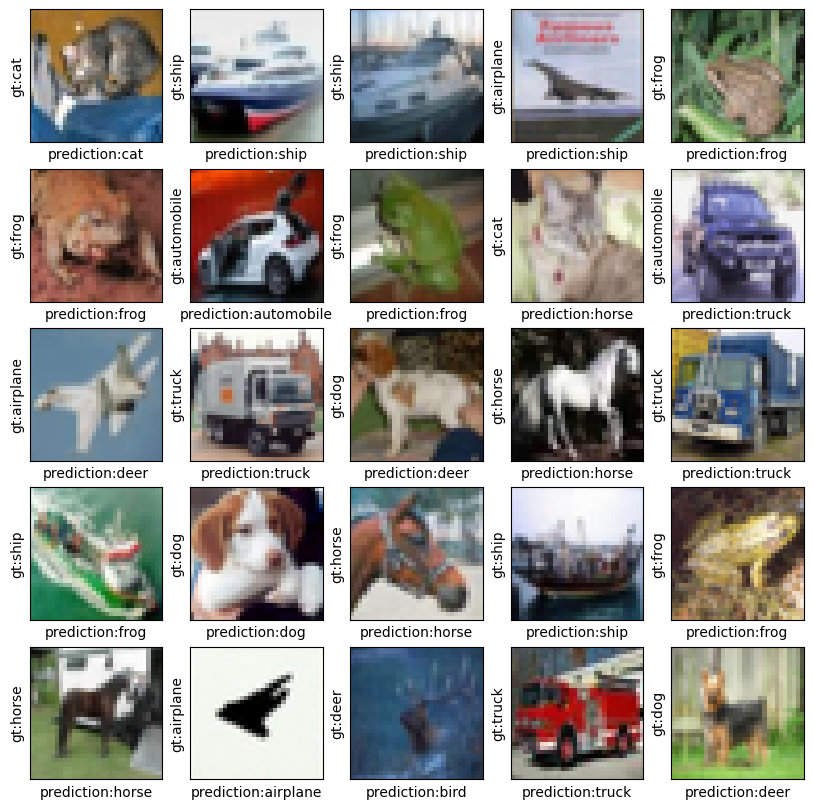

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(f'prediction:{class_names[np.argmax(y_pred[i])]}')
    plt.ylabel(f'gt:{class_names[test_labels.flatten()[i]]}')
plt.show()